In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv("Healthcare.csv")

In [0]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [0]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Checking for null values

In [0]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [0]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [0]:
df['bmi'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
43395    False
43396    False
43397    False
43398    False
43399    False
Name: bmi, Length: 43400, dtype: bool

# Data Cleaning Part

In [0]:
df['bmi'].mean()

28.605038390004545

# Filling blank values by mean of bmi

In [0]:
mean_bmi=df['bmi'].mean()

In [0]:
def fill_bmi(bmi):
    if np.isnan(bmi):
        return mean_bmi
    else:
        return bmi

In [0]:
df['bmi']=df.apply(lambda x: fill_bmi(x['bmi']),axis=1)

In [0]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [0]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.024634,0.018382,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.237627,0.352236,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.160211,0.153779,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.146938,0.054133,0.113763
avg_glucose_level,0.024634,0.237627,0.160211,0.146938,1.000000,0.184199,0.078917
bmi,0.018382,0.352236,0.153779,0.054133,0.184199,1.000000,0.018407
stroke,0.002976,0.156049,0.075332,0.113763,0.078917,0.018407,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Filling blank values of Smoking staus by NA


In [0]:
df['smoking_status']=df['smoking_status'].replace(np.nan,'NA')

In [0]:
df['smoking_status'].isna().sum()

0

In [0]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NA,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NA,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## If age is less than 18, changing smoking status to never smoked

In [0]:
def never_smoked(age,smoking_status):
    if age<18 and smoking_status=='NA':
        return 'never smoked'
    else:
        return smoking_status

In [0]:
df['smoking_status']=df.apply(lambda x: never_smoked(x['age'],x['smoking_status']),axis=1)

In [0]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## If age is less than 18 replacing work type as children

In [0]:
def work(age,work_type):
    if age<18 and work_type=='Never_worked':
        return 'children'
    else:
        return work_type

In [0]:
df['work_type']=df.apply(lambda x: work(x['age'],x['work_type']),axis=1)

In [0]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,children,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## Checking for null values after data cleaning

In [0]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Categorical Variables and Dummy Variables


In [0]:
dummies=pd.get_dummies(df[['ever_married', 'work_type','Residence_type','smoking_status','gender']],drop_first=True)
df = df.drop(['ever_married', 'work_type','Residence_type','smoking_status','gender'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [0]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,gender_Other
0,30669,3.0,0,0,95.12,18.0,0,0,0,0,0,1,0,0,1,0,1,0
1,30468,58.0,1,0,87.96,39.2,0,1,0,1,0,0,1,0,1,0,1,0
2,16523,8.0,0,0,110.89,17.6,0,0,0,1,0,0,1,0,1,0,0,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,1,0,0,0,1,0,0,0,0
4,46136,14.0,0,0,161.28,19.1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0,0,0,0,0,1,1,0,1,0,0,0
43396,5450,56.0,0,0,213.61,55.4,0,1,0,0,0,0,1,1,0,0,0,0
43397,28375,82.0,1,0,91.94,28.9,0,1,0,1,0,0,1,1,0,0,0,0
43398,27973,40.0,0,0,99.16,33.2,0,1,0,1,0,0,1,0,1,0,1,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43400 non-null  int64  
 1   age                             43400 non-null  float64
 2   hypertension                    43400 non-null  int64  
 3   heart_disease                   43400 non-null  int64  
 4   avg_glucose_level               43400 non-null  float64
 5   bmi                             43400 non-null  float64
 6   stroke                          43400 non-null  int64  
 7   ever_married_Yes                43400 non-null  uint8  
 8   work_type_Never_worked          43400 non-null  uint8  
 9   work_type_Private               43400 non-null  uint8  
 10  work_type_Self-employed         43400 non-null  uint8  
 11  work_type_children              43400 non-null  uint8  
 12  Residence_type_Urban            

# Creating visualization to understand data

### People having hypertension who smokes

In [0]:
smoke_stroke = df[(df['smoking_status_smokes']==1)]

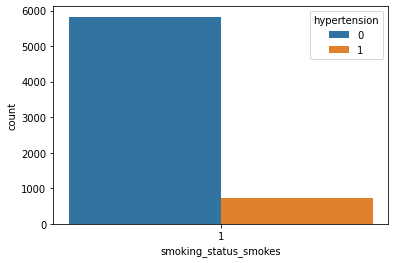

In [0]:
sns.countplot(x='smoking_status_smokes',data=smoke_stroke,hue='hypertension')

### People having heart disease who smokes

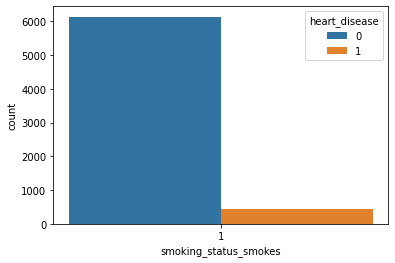

In [0]:
sns.countplot(x='smoking_status_smokes',data=smoke_stroke,hue='heart_disease')

### Male and female who smokes and have heart disease


### People who never smoked and have heart disease


In [0]:
never_smoked=df[(df['smoking_status_never smoked']==1)]

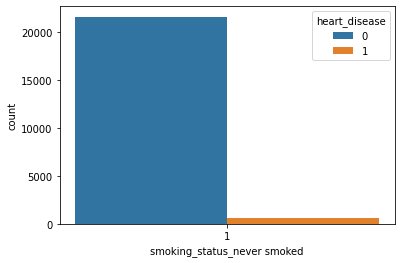

In [0]:
sns.countplot(x='smoking_status_never smoked',data=never_smoked,hue='heart_disease')

### People who never smoked and have hypertension

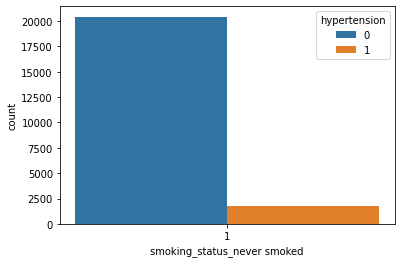

In [0]:
sns.countplot(x='smoking_status_never smoked',data=never_smoked,hue='hypertension')

### Average glucose level for people who smokes

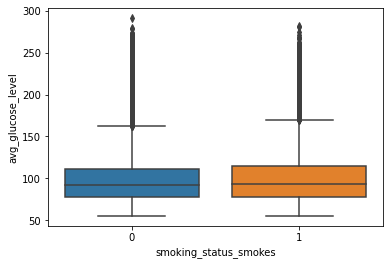

In [0]:
sns.boxplot(x='smoking_status_smokes',y='avg_glucose_level',data=df)

### Age of people who smokes


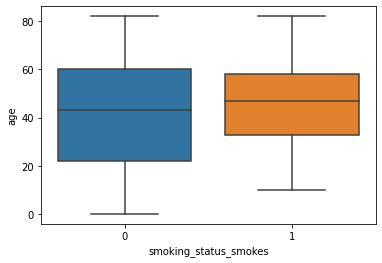

In [0]:
sns.boxplot(x='smoking_status_smokes',y='age',data=df)

##Now Creating Models for machine learning

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop('stroke',axis=1).values
y = df['stroke'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
# import data modeling and metric libraries
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [0]:
!pip install catboost

     |████████████████████████████████| 64.8MB 59kB/s 


In [0]:
classifiers = [LogisticRegressionCV(cv=5), RidgeClassifierCV(cv=5), SGDClassifier(), DecisionTreeClassifier(), 
               ExtraTreeClassifier(), RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(), 
               ExtraTreesClassifier(n_estimators=100), AdaBoostClassifier(),BaggingClassifier(), XGBClassifier(), GaussianNB(), 
               LinearSVC(), SVC(gamma='scale'), KNeighborsClassifier(), LGBMClassifier(), CatBoostClassifier()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print('='*70)
    print(name)
    print('****Results****')
    print('\n')
    preds = clf.predict(X_test)
    print('Confusion_Matrix :')
    print(confusion_matrix(y_test, preds))
    print('\n')
    print('Classification_Report :')
    print(classification_report(y_test, preds))
    print('\n')
    print(f'Accuracy_Score : {(accuracy_score(y_test, preds)*100):.2f}%')
    print('\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV
****Results****


Confusion_Matrix :
[[12785     0]
 [  235     0]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



Accuracy_Score : 98.20%




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RidgeClassifierCV
****Results****


Confusion_Matrix :
[[12785     0]
 [  235     0]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



Accuracy_Score : 98.20%




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SGDClassifier
****Results****


Confusion_Matrix :
[[12765    20]
 [  232     3]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.13      0.01      0.02       235

    accuracy                           0.98     13020
   macro avg       0.56      0.51      0.51     13020
weighted avg       0.97      0.98      0.97     13020



Accuracy_Score : 98.06%


DecisionTreeClassifier
****Results****


Confusion_Matrix :
[[12502   283]
 [  220    15]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12785
           1       0.05      0.06      0.06       235

    accuracy                           0.96     13020
   macro avg       0.52      0.52      0.52     13020
weighted avg       0.97      0.96      0.96     13020



Accuracy_Score : 96.14%


ExtraTreeClassifier
****Results****


Confusion_Matrix :
[[12563 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
****Results****


Confusion_Matrix :
[[12781     4]
 [  235     0]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



Accuracy_Score : 98.16%


SVC
****Results****


Confusion_Matrix :
[[12785     0]
 [  235     0]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



Accuracy_Score : 98.20%


KNeighborsClassifier
****Results****




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion_Matrix :
[[12777     8]
 [  235     0]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



Accuracy_Score : 98.13%


LGBMClassifier
****Results****


Confusion_Matrix :
[[12773    12]
 [  229     6]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.33      0.03      0.05       235

    accuracy                           0.98     13020
   macro avg       0.66      0.51      0.52     13020
weighted avg       0.97      0.98      0.97     13020



Accuracy_Score : 98.15%


Learning rate set to 0.044259
0:	learn: 0.6094684	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.5323498	tota

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.7MB/s 


In [0]:
import shap

In [0]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=1dbf548e2394c59aed0f1ae61cc1df0f4e3f85cd28ff799c47efb391283bc0c3
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
pi = PermutationImportance(gbc).fit(X_test, y_test)
eli5.show_weights(pi,feature_names = df.columns.tolist()[:-1])

Weight,Feature
0.0009 ± 0.0008,heart_disease
0.0008 ± 0.0005,age
0.0001 ± 0.0002,bmi
0.0000 ± 0.0001,work_type_children
0.0000 ± 0.0002,id
0 ± 0.0000,ever_married_Yes
0 ± 0.0000,hypertension
0 ± 0.0000,stroke
0 ± 0.0000,gender_Male
0 ± 0.0000,smoking_status_smokes


The above table shows that heart_disease and age are important feature for our prediction.

In [0]:
import shap

In [0]:
shap_explainer = shap.TreeExplainer(gbc)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
shap_values = shap_explainer.shap_values(df)

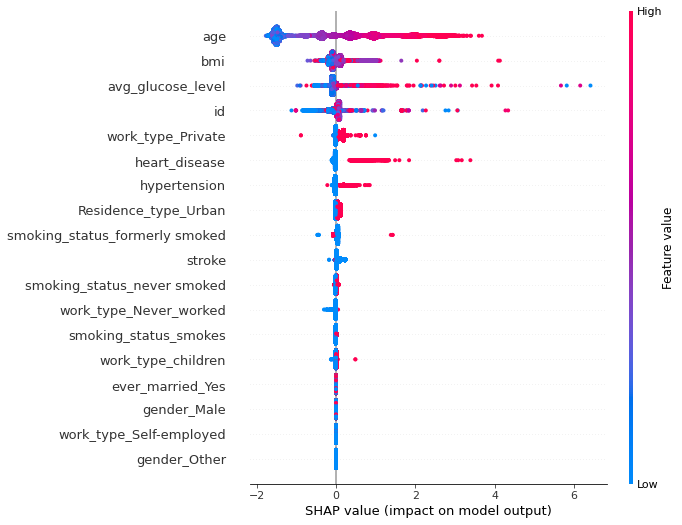

In [0]:
shap.summary_plot(shap_values, df)

Above the visualization shows which variable contributed to our model for predictions.

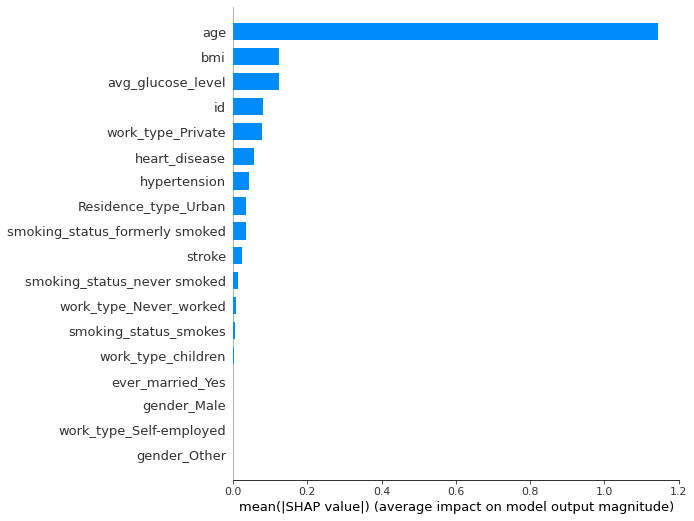

In [0]:
shap.summary_plot(shap_values, df, plot_type='bar')
